<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 7

**Submission deadline:**
* **lab session in the week 22-26.1.24**

**Points: 5 points**


Have a look at the following implementation of Decision Tree Classifier. Be aware that for the sake of further simplicity it does not allow for categorical variables as typical Decision Trees do.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count)}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count)}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        best_gini = 1.0
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                gini = self.calculate_gini_impurity(y[left_indices], y[right_indices])

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_gini_impurity(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        gini_left = 1.0 - sum((np.sum(left_labels == c) / left_size) ** 2 for c in set(left_labels))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / right_size) ** 2 for c in set(right_labels))

        gini_impurity = p_left * gini_left + p_right * gini_right

        return gini_impurity

    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]


# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two features for visualization purposes
X_iris = iris_df[['petal length (cm)', 'petal width (cm)']]
y_iris = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train the decision tree classifier from scratch
clf = DecisionTreeClassifierScratch(max_depth=4)
clf.tree = clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


In [ ]:
def plot_decision_boundary(X, y, tree, feature_names, title="Decision Boundary"):
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = np.array(tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names))).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

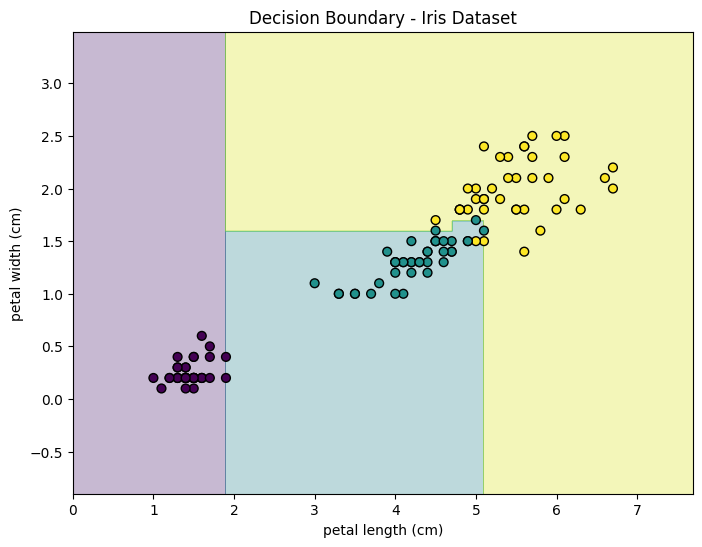

In [ ]:
feature_names = X_iris.columns
plot_decision_boundary(X_train, y_train, clf, feature_names, title="Decision Boundary - Iris Dataset")


# Problem 1 [1p]

Based on above implementation, create a Decision Tree model which uses entropy and not Gini. Verify its accuracy on Iris (as above) and plot decision boundaries.

In [ ]:
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count)}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count)}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        best_entropy = float('inf')
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                gini = self.calculate_entropy_impurity(y[left_indices], y[right_indices])

                if gini < best_entropy:
                    best_entropy = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_entropy_impurity(self, left_labels, right_labels):
      left_size = len(left_labels)
      right_size = len(right_labels)
      total_size = left_size + right_size

      if total_size == 0:
          return 0

      p_left = left_size / total_size
      p_right = right_size / total_size

      # Zmiana wzoru na entropię
      entropy_left = -sum((np.sum(left_labels == c) / left_size) * np.log2(np.sum(left_labels == c) / left_size) for c in set(left_labels) if np.sum(left_labels == c) > 0)
      entropy_right = -sum((np.sum(right_labels == c) / right_size) * np.log2(np.sum(right_labels == c) / right_size) for c in set(right_labels) if np.sum(right_labels == c) > 0)

      entropy = p_left * entropy_left + p_right * entropy_right

      return entropy

    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]


# Create and train the decision tree classifier from scratch
clf = DecisionTreeClassifierScratch(max_depth=4)
clf.tree = clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


# Problem 2 [2p]

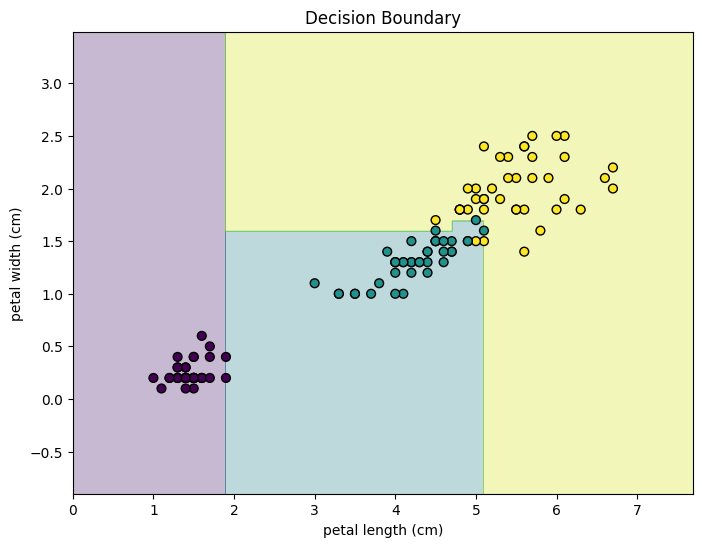

Accuracy: 1.00


In [ ]:
from math import  inf
class DecisionTreeClassifierCrossEntropy:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count) if not y.empty else None}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count) if not y.empty else None}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        best_sum_cross_entropy = inf
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                sum_cross_entropy = self.calculate_cross(y[left_indices], y[right_indices])

                if sum_cross_entropy < best_sum_cross_entropy:
                    best_sum_cross_entropy = sum_cross_entropy
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_cross(self, left_labels, right_labels):
      left_size = len(left_labels)
      right_size = len(right_labels)
      total_size = left_size + right_size

      if total_size == 0:
          return 0

      entropy_left = -sum((np.sum(left_labels == c) ) * np.log2(np.sum(left_labels == c) / total_size) for c in set(left_labels) if np.sum(left_labels == c) > 0)
      entropy_right = -sum((np.sum(right_labels == c) ) * np.log2(np.sum(right_labels == c) / total_size) for c in set(right_labels) if np.sum(right_labels == c) > 0)

      cross_entropy = (left_size / total_size) * entropy_left + (right_size / total_size) * entropy_right

      return cross_entropy



    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

    # Create and train the decision tree classifier from scratch
clf2 = DecisionTreeClassifierCrossEntropy(max_depth=4)
clf2.tree = clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
plot_decision_boundary(X_train, y_train, clf2, feature_names, title="Decision Boundary")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Default versions of Decision Trees use entropy or Gini to find best features. However, there are is no global objective function that they optimize while training.

Based on the above implementation, please write Decision Tree Classifier that explicitely minimizes the crossentropy function, and makes splits in a greedy way that creates the biggest drop in the Negative Log Likelihood. Verify its accuracy on Iris (as above) and plot decision boundaries.

# Problem 3 [2p]

Based on the above implementation, create a Decision Tree Regressor which greedily chooses a split which locally minimizes MSE the most. Verify its correctness as shown below.

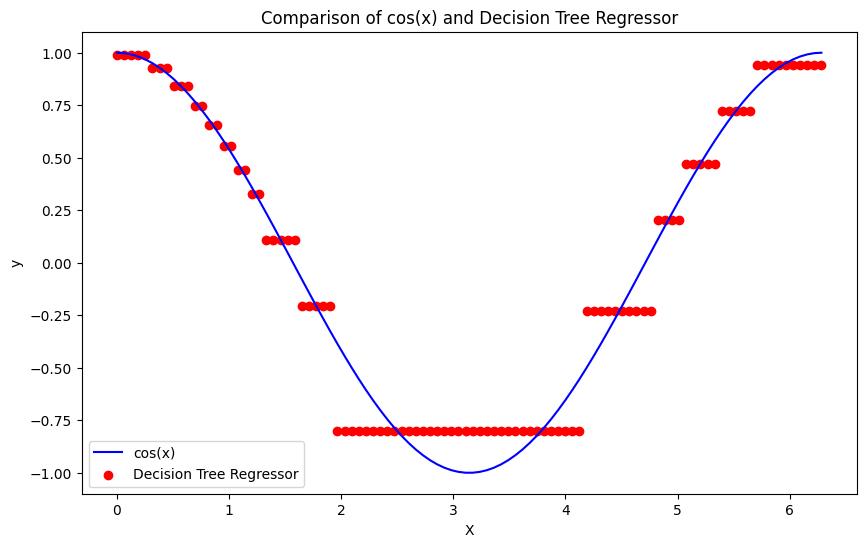

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate dataset
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)  # X values
y = np.cos(X).ravel()  # y values (cos(x))


# Create and train the decision tree regressor from scratch
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X, y)

# Predict on the generated dataset
y_pred = regressor.predict(X)

# Plotting both the cos(x) and the decision tree regressor predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='cos(x)', color='blue')
plt.scatter(X, y_pred, label='Decision Tree Regressor', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of cos(x) and Decision Tree Regressor')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


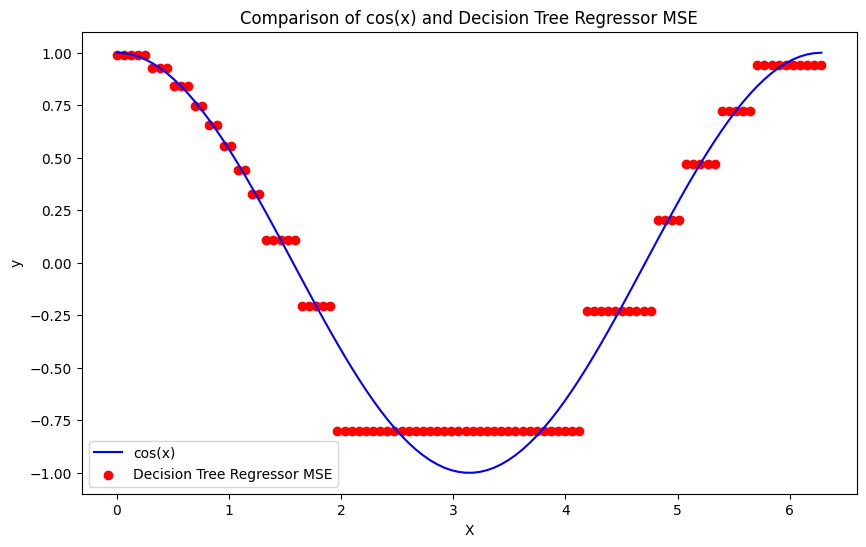

In [ ]:
class DecisionTreeRegressorMSE:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            return {'value': np.mean(y)}

        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'value': np.mean(y)}

        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                mse = self.calculate_mse(y[left_indices], y[right_indices])

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_mse(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        mean_left = np.mean(left_labels)
        mean_right = np.mean(right_labels)

        mse_left = np.mean((left_labels - mean_left) ** 2)
        mse_right = np.mean((right_labels - mean_right) ** 2)

        mse = (left_size / total_size) * mse_left + (right_size / total_size) * mse_right

        return mse

    def predict_single(self, tree, sample):
        if 'value' in tree:
            return tree['value']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]

X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.cos(X).ravel()



regressor_custom = DecisionTreeRegressorMSE(max_depth=4)
regressor_custom.tree = regressor_custom.fit(pd.DataFrame(X, columns=['feature']), y)


y_pred = regressor_custom.predict(pd.DataFrame(X, columns=['feature']))

plt.figure(figsize=(10, 6))
plt.plot(X, y, label='cos(x)', color='blue')
plt.scatter(X, y_pred, label='Decision Tree Regressor MSE', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of cos(x) and Decision Tree Regressor MSE')
plt.legend()
plt.show()